## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [ ]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## **Coleta de dados**


In [ ]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df = pd.get_dummies(df).drop(columns="sex_male") #substituindo colunas categoricas e dropando coluna correlacionada
y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [ ]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [ ]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_female','embarked_C','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_female','embarked_C','embarked_Q','embarked_S']].reset_index(drop=True))

In [ ]:
X_test

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,0.825248,0.496095,-0.498616,-0.432553,-0.502719,0.0,0,0,1
1,0.825248,-0.673461,0.425943,0.686709,-0.339518,0.0,1,0,0
2,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,0.0,0,0,1
3,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,0.0,0,0,1
4,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...
388,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,0.0,0,0,1
389,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,0.0,1,0,0
390,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,0.0,0,0,1
391,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,1.0,0,0,1


In [ ]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

In [ ]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    0.0
1307    1.0
1308    1.0
Name: survived, Length: 1309, dtype: float64

###### **Pandas_profiling**

Inclui um relatório de perfil. Ele sintetizará os tipos das colunas e permitirá que você visualize os detalhes estatistíco dos quantis, as estatísticas descritivas, hitogramas, valores comuns e extremos.

In [ ]:
import pandas_profiling
#pandas_profiling.ProfileReport(df)

## **Tamanho de dados**

In [ ]:
X.shape

(1309, 9)

In [ ]:
X

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
0,0.825248,-0.128878,-0.498616,-0.432553,-0.473599,0.0,0,0,1
1,0.825248,-0.205639,-0.498616,-0.432553,-0.488120,0.0,0,0,1
2,-0.363317,-0.751431,-0.498616,-0.432553,-0.145224,1.0,0,0,1
3,0.825248,-2.198733,6.897852,1.805972,0.679618,1.0,0,0,1
4,0.825248,-0.049698,-0.498616,-0.432553,-0.490408,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,0.0,0,0,1
1305,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,0.0,1,0,0
1306,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,0.0,0,0,1
1307,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,1.0,0,0,1


## **Estatísticas resumidas**

In [ ]:
X.describe().iloc[:, [0, -1]]

,pclass,embarked_S
count,1309.000000,1309.000000
mean,-0.012831,0.698243
std,0.995822,0.459196
min,-1.551881,0.000000
25%,-0.363317,0.000000
50%,0.825248,1.000000
75%,0.825248,1.000000
max,0.825248,1.000000


## **Histograma**

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

X.fare.plot(kind="hist", ax=ax)
plt.show()

Valores contínuos em relação ao alvo 

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

mask = y_train == 1
mask = mask.reset_index(drop=True)

ax = sns.distplot(X_train[mask].fare, label="survived")
ax = sns.distplot(X_train[~mask].fare, label="died")
ax.set_xlim(-1.5, 1.5)
ax.legend()

## **Gráfico de Dispersão (scatter plot)**

Mostra o relacionamento entre duas colunas númericas

O resultado não parece que tem uma correção entre os dois atributos

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
X.plot.scatter(
    x="age",
    y="fare",
    ax=ax,
    alpha=0.3
)
plt.show()


In [ ]:
X.age.corr(X.fare) #baixa correlação

0.177161766658615

## **Gráfico conjunto**


Gráfico de dispersão mais sofisticado (histogramas nas bordas e linha de regressão, que é chamada de joint plot)

In [ ]:
from yellowbrick.features import (
    JointPlotVisualizer
)

fig, ax = plt.subplots(figsize=(6,6))


jpv = JointPlotVisualizer(
    feature="age", target="fare"
)

jpv.fit(X.age, X.fare)
jpv.poof()


In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

new_df = X.copy()
new_df['target'] = y
sns.jointplot(
    "age", "fare", data=new_df, kind="reg")


## **Matriz de pares**


In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
vars = ['pclass', 'fare', 'age']
sns.pairplot(
    data=new_df, vars=vars, hue='target', kind='reg'
    )


## **Box plot**


In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(x=new_df['target'], y="age", data= new_df)

## **Violin plot**


In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot(x=new_df['target'], y="age", data= new_df)

## **Correlação**
Colunas com alto grau de correlação não agregam valor e podem prejudicar a interpretação da importância dos atributos e do coeficiente de regressão.

Se tivemos colunas correlacionas, poderíamos optar por remover

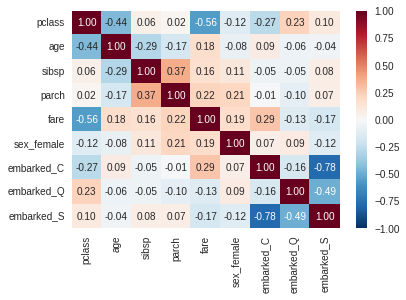

In [ ]:
sns.heatmap(
    X.corr(),
    fmt=".2f",
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1)

In [ ]:
X.corr()

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q,embarked_S
pclass,1.000000,-0.440285,0.060832,0.018322,-0.558833,-0.124617,-0.269658,0.230491,0.096335
age,-0.440285,1.000000,-0.291692,-0.174986,0.177162,-0.077334,0.085051,-0.060629,-0.041608
sibsp,0.060832,-0.291692,1.000000,0.373587,0.160459,0.109609,-0.048396,-0.048678,0.075198
parch,0.018322,-0.174986,0.373587,1.000000,0.221725,0.213125,-0.008635,-0.100943,0.073258
fare,-0.558833,0.177162,0.160459,0.221725,1.000000,0.185861,0.286467,-0.129848,-0.172986
sex_female,-0.124617,-0.077334,0.109609,0.213125,0.185861,1.000000,0.066564,0.088651,-0.119504
embarked_C,-0.269658,0.085051,-0.048396,-0.008635,0.286467,0.066564,1.000000,-0.164166,-0.775441
embarked_Q,0.230491,-0.060629,-0.048678,-0.100943,-0.129848,0.088651,-0.164166,1.000000,-0.489874
embarked_S,0.096335,-0.041608,0.075198,0.073258,-0.172986,-0.119504,-0.775441,-0.489874,1.000000


## **RadViz**


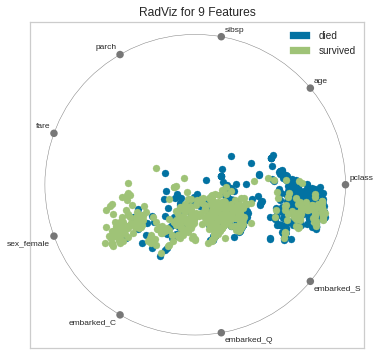

In [ ]:
from yellowbrick.features import RadViz

fig, ax = plt.subplots(figsize=(6,6))

rv = RadViz(
    classes=['died', 'survived'],
    features=X.columns
)

rv.fit(X,y)
_ = rv.transform(X)
rv.poof()

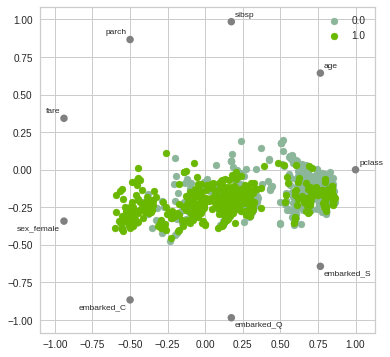

In [ ]:
from pandas.plotting import radviz

fig, ax = plt.subplots(figsize=(6,6))

radviz(
    new_df, "target", ax=ax, 
)

## **Coordenadas paralelas**


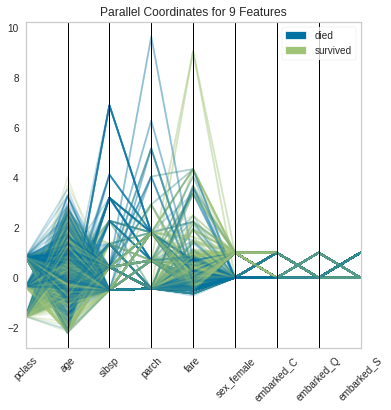

In [ ]:
from yellowbrick.features import ParallelCoordinates

fig, ax = plt.subplots(figsize=(6,6))

pc = ParallelCoordinates(
    classes=['died', 'survived'],
    features=X.columns
)

pc.fit(X,y)
pc.transform(X)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45
)
pc.poof()

[Text(0, 0, 'pclass'),
 Text(0, 0, 'age'),
 Text(0, 0, 'sibsp'),
 Text(0, 0, 'parch'),
 Text(0, 0, 'fare'),
 Text(0, 0, 'sex_female'),
 Text(0, 0, 'embarked_C'),
 Text(0, 0, 'embarked_Q'),
 Text(0, 0, 'embarked_S')]

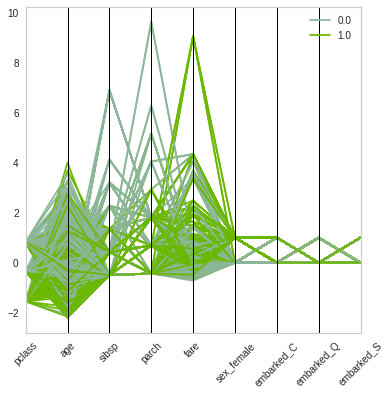

In [ ]:
from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(figsize=(6,6))

parallel_coordinates(
    new_df, "target", ax=ax
)

ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45
)